# 0.0.KERAS_TEMPLATE

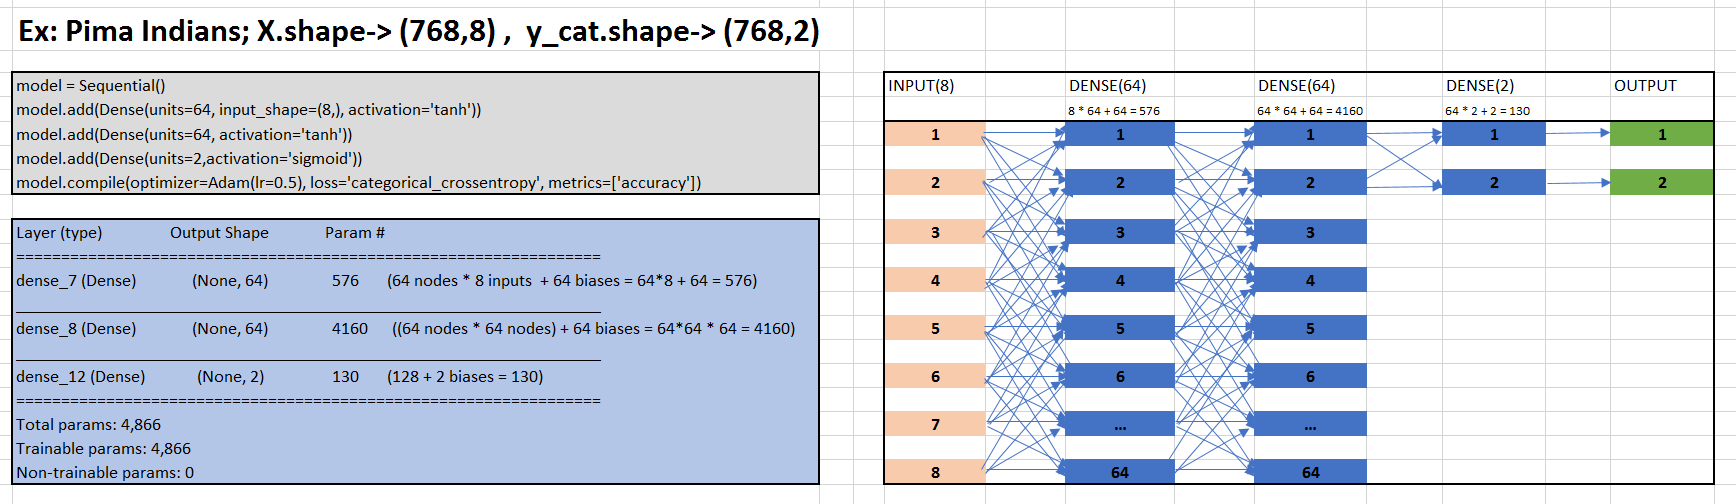

In [7]:
from IPython.display import Image 
Image(filename='images/FC_explained.PNG', height=500, width=800)

### General syntax

In [ ]:
type(data)
data.shape

#Extact columns from array
labels = data[:,-1] # last column
features = data[:,:-1] # all columns except last

#?????
%config InlineBackend.figure_format = 'retina'

np.linspace(0,1, num=10)

### Imports

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
----------------------------------------------------------------------------------------------
import seaborn as sns
----------------------------------------------------------------------------------------------
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, cross_val_predict, KFold
from sklearn.ensemble import RandomForestClassifier 

from sklearn.preprocessing import scale
----------------------------------------------------------------------------------------------
import keras
import keras.backend as K

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam #Adadelta, Adagrad, Adamax, K, Nadam, RMSprop, SGD, TFOptimizer

### Analysis of input data

In [ ]:
# Summary
pimaDF.info()
pimaDF.describe() # autoDF.describe(include='all')
pimaDF.head()
pimaDF.corr().round(2)
pimaDF.shape
pimaDF.groupby("class").size()
irisDF.columns
autoDF.stroke.astype('float').mean()
----------------------------------------------------------------------------------------------
# Select
autoDF[autoDF.columns[65:]].head()
autoDF.isnull().any().head(10)
autoDF[autoDF['peak-rpm'].isnull()]
autoDF.isnull().any().head(10)
----------------------------------------------------------------------------------------------
# Count:
df['class'].value_counts() /len(df['class'])
df[1:2]
df.left.unique()
df.left.value_counts()  # df['class'].value_counts() 
df.query('left==1').salary.value_counts()
df.iloc[1:5, 0:2]
autoDF[autoDF.isnull()].any(axis=1).value_counts()
----------------------------------------------------------------------------------------------
# Replace :
autoDF.replace(to_replace='?', value=np.NAN, inplace=True)
----------------------------------------------------------------------------------------------
# Filter:
autoDF.filter(autoDF.price.isnull()).head()
autoDF.filter(autoDF.price.notnull()).head()
autoDF.filter(autoDF.price.notna()).head()
----------------------------------------------------------------------------------------------
# Sort:
np.sort(autoDF.price.unique())
autoDF.price.sort(ascending=False)
autoDF.sort_values('price', na_position='first').head()
sorted(autoDF.price.astype('int'), reverse=True)[0:10]
autoDF.isnull().any().sort_values(ascending=False).head()
autoDF.stroke.value_counts().sort_values(ascending=False).head() # doesn't show nans
----------------------------------------------------------------------------------------------
# Count:
autoDF.price.count()
autoDF[autoDF.price.isnull()].price.count()
autoDF[autoDF.price == None].price.count()
----------------------------------------------------------------------------------------------
# Drop:
X.drop(['sales','salary'], axis= 1, inplace=True)
autoDF.drop('normalized-losses', axis='columns', inplace=True)
----------------------------------------------------------------------------------------------
# Type conversion:
autoDF['price_numeric'] = pd.to_numeric(autoDF.price, errors='coerce') # ignore errors
----------------------------------------------------------------------------------------------
# Concat:
df3 = pd.concat([df1,df2], axis = 1)

### Plots-PRE

In [ ]:
# Histogram
pimaDF.hist(figsize=(12,10));    # same as _=pimaDF.hist(figsize=(12,10))
----------------------------------------------------------------------------------------------
# Pairplot
sns.pairplot(pimaDF, hue='class')
sns.pairplot(df, hue='species')
----------------------------------------------------------------------------------------------
# Histogram of all columns
plt.figure(figsize=(15,4))
for i, c in enumerate(df.columns): 
    plt.subplot(1,4,i+1)
    df[c].plot(kind='hist', title=c)  
----------------------------------------------------------------------------------------------
# Histogram of all columns
x= 0
for n in range(2):
    plt.figure(figsize=(15,4))
    for i, c in enumerate(df.iloc[:,x:x+4].columns):
        print(i,c)
        plt.subplot(n+1,4, i+1)
        df[c].plot(kind='hist')
        plt.xlabel(c)
    x = x + 4
----------------------------------------------------------------------------------------------
# Pairplot
import seaborn as sns
sns.pairplot(pimaDF, hue='class')
sns.pairplot(data=irisDF, hue='species', height=1.5)
sns.pairplot(data=irisDF, hue='species', height=1.5, diag_kind="kde", markers="+")
sns.pairplot(data=irisDF, hue='species', height=1.5, kind="reg")
----------------------------------------------------------------------------------------------
pimaDF.plot(kind='box', figsize=(12, 8), subplots=True, layout=(3, 3),sharex=False, sharey=False)
----------------------------------------------------------------------------------------------
# Count plot
sns.countplot(x='class', data=pimaDF)
----------------------------------------------------------------------------------------------
df.plot(kind='scatter', x='Time (min)', y='Buy')
----------------------------------------------------------------------------------------------
# Heat map
sns.heatmap(pimaDF.corr())
sns.heatmap(pimaDF.corr(), annot=True)
sns.heatmap(pimaDF.corr(), annot=True, cmap="YlGnBu")
----------------------------------------------------------------------------------------------
# Box plot
pima.plot(kind= 'box' , subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(10,8))
----------------------------------------------------------------------------------------------
# scatter plot matrix
from pandas.plotting import scatter_matrix
scatter_matrix(dataset)
plt.show()
----------------------------------------------------------------------------------------------
plt.scatter('Weight', 'Height', data=df.query('Gender == "Male"'), color='black', label='Male', alpha=0.1)
plt.scatter('Weight', 'Height', data=df.query('Gender == "Female"'), color='red', label='Female', alpha=0.1)
plt.title("Price vs. Rain of Bordeaux wine bottles")
plt.xlabel("Weight")
plt.ylabel("Height")
plt.legend(loc='upper center')  # add a legend for clarity
plt.grid(True)
plt.show()
----------------------------------------------------------------------------------------------
ax =  df.plot(kind='scatter', x = 'Time (min)', y='Buy')
temp = np.linspace(0,4)  #np.linspace(0,4, 50)
ax.plot(temp, model.predict(temp), color='orange')
plt.legend(['model', 'data'])
----------------------------------------------------------------------------------------------
plt.figure(figsize=(12,3))
for i, feature in enumerate(['Weight',	'fatored_weight', 'scaled_weight',	'std_scaled_weight']):
    plt.subplot(1,4,i+1)
    df[feature].plot(kind='hist', title=feature)
    plt.xlabel(feature)
----------------------------------------------------------------------------------------------
plt.plot(X[y==0,0], X[y==0, 1], 'ob')
plt.plot(X[y==1,0], X[y==1, 1], 'xr')
plt.legend(['y=0', 'y=1'])
plt.title('Plotting make moons X[0] v/s X[1], with different color & shape for y values')
----------------------------------------------------------------------------------------------
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()
----------------------------------------------------------------------------------------------
piris = pd.melt(iris, "species", var_name="measurement") 
sns.factorplot(x="measurement", y="value", hue="species", data=piris, size=7, kind="bar",palette="bright")
plt.show() 
----------------------------------------------------------------------------------------------
history = model.fit(X_train, y_train, epochs=10)
historyDF.plot(ylim=(0,1))
plt.title('Test Loss: {:3.1f} %, Accuracy: {:3.1F} %'.format(result[0]*100,result[1]*100), fontsize=15)
----------------------------------------------------------------------------------------------
dfList = []
learning_rates = [0.01, 0.05, 0.1, 0.5]
for lr in learning_rates:
    K.clear_session()  # clear memory
    model = Sequential()
    model.add(Dense(1, input_shape=(4,), activation='sigmoid'))
    model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
    h = model.fit(X_train, y_train, epochs=3, batch_size=16)
    dfList.append(pd.DataFrame(h.history, index=h.epoch))
historyDF = pd.concat(dfList, axis=1)
metrics_reported = dfList[0].columns
index = pd.MultiIndex.from_product([learning_rates, metrics_reported], names=['learning rate', 'metric'])
historyDF.columns = index

ax = plt.subplot(211)
historyDF.xs('loss', axis=1, level='metric').plot(ylim=(0,2), ax=ax)
plt.title('Loss')

ax = plt.subplot(212)
historyDF.xs('acc', axis=1, level='metric').plot(ylim=(0,2), ax=ax)
plt.title('Loss')

plt.tight_layout()
----------------------------------------------------------------------------------------------


### Plots-POST

In [ ]:
plt.plot(X, y,  "*") 
plt.scatter(X, y_pred, color='b')
plt.title('Prediction with epochs=25')

### Read Data

In [ ]:
processed_data_path = os.path.join(os.path.pardir, 'data', 'processed') #'../data/processed
train_data_path = os.path.join(processed_data_path, 'train.csv') #'../data/processed/train.csv' 
test_data_path = os.path.join(processed_data_path, 'test.csv')
----------------------------------------------------------------------------------------------
trainDF = pd.read_csv(train_data_path, index_col='PassengerId')
testDF = pd.read_csv(test_data_path, index_col='PassengerId')
----------------------------------------------------------------------------------------------
from numpy import genfromtxt  # generate a numpy array from text file
data = genfromtxt('../../data/raw/Computer-Vision-with-Python_Joseph_Portilla/DATA/bank_note_data.txt', delimiter=',')

from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
----------------------------------------------------------------------------------------------
### Keras Datasets
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=1000, noise=0.1, random_state=42)
----------------------------------------------------------------------------------------------
import os
exams_file = os.path.join(os.path.pardir, 'data','raw', 'exams.csv')
examDF = pd.read_csv(exams_file)

### Select X & y

In [ ]:
X = trainDF.loc[:, 'Adult_No':].values.astype('float')
y = trainDF.Survived.ravel()
----------------------------------------------------------------------------------------------
X = df[['sqft','bdrms','age']]
y = df['price']
----------------------------------------------------------------------------------------------
X = df2[:,0:3]
y = df2[:,3]
----------------------------------------------------------------------------------------------
X = pd.concat([X, sales_salary_dummies], axis=1)

### Train/Test Split

In [ ]:
# sometimes people like to split 3 ways, train/test/validation
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
----------------------------------------------------------------------------------------------
validation_size = 0.20
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y,  test_size=validation_size,
                                        stratify=y)  #????

### Check for (Im)balance

In [ ]:
np.mean(y_train), np.mean(y_test)  
# Ex: (0.38342696629213485, 0.38547486033519551) -> We have same proportion(39%) of positive class in y_train & 
#     y_test (ideally, you want the positive classes evenly distributed in train & test data)
#     But we have imbalanced(+ve: 39%, -ve: 61%) classes in both datasets. 

### Dummy Classifier

In [ ]:
from sklearn.dummy import DummyClassifier
dummyModel = DummyClassifier(random_state=0, strategy='most_frequent')
# OPTIONS: "most_frequent", "stratified", "uniform",  "constant", "prior"
dummyModel.fit(X=X_train, y = y_train)
prediction = dummyModel.predict(X=X_test)
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
print(accuracy_score(y_test, prediction)) 
# Ex: accuracy_score(y_test, prediction) =  0.61452513966480449 -> This is base line accuracy; any model 
#     that you'll build should have an accuracy score better than this
print(precision_score(y_test, prediction))
print(recall_score(y_test, prediction))
print(confusion_matrix(y_test, prediction))

### Convert to numerical index(from array)

In [ ]:
y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

### Feature Engineering (Scaling the data)

In [ ]:
# -> Fit training data only (to prevent data leakage)
# -> Transform both training and test data
# Method #1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1), copy=True)  #same as scaler = MinMaxScaler()
scaler_object = scaler.fit(X_train) # finds the min and max values
X_train_scaled = scaler_object.transform(X_train)
X_test_scaled = scaler_object.transform(X_test)
----------------------------------------------------------------------------------------------
MinMax Scaler:
from sklearn.preprocessing import MinMaxScaler
mmScaler = MinMaxScaler()
df['scaled_weight'] = mmScaler.fit_transform(df[['Weight']])
----------------------------------------------------------------------------------------------
scaled1 = min_max_sacler.fit_transform(millWkPandasDF3F_filtered_filled)
----------------------------------------------------------------------------------------------
# Method #2 
X_train_scaled = X_train / X_train.max()
X_test_scaled = X_train / X_test.max()
----------------------------------------------------------------------------------------------
# Method #3
from sklearn.preprocessing import StandardScaler
sScaler = StandardScaler()
X = sScaler.fit_transform(pimaDF.drop('class', axis=1))
----------------------------------------------------------------------------------------------
# Dummies
pd.get_dummies(df.Gender, prefix='Gender').head()
----------------------------------------------------------------------------------------------
# Dummies
sales_salary_dummies = pd.get_dummies(df[['sales', 'salary']])
type(sales_salary_dummies) #pandas.core.frame.DataFrame

for c in sales_salary_dummies.columns:
    print(c, ':', sales_salary_dummies[c].value_counts())
----------------------------------------------------------------------------------------------    
# Dummies
autoDF = pd.get_dummies(data=autoDF, columns=['make', 
                                              'fuel-type', 
                                              'aspiration', 
                                              'num-of-doors',
                                              'body-style', 
                                              'drive-wheels', 
                                              'engine-location',
                                              'engine-type',
                                              'fuel-system'])
---------------------------------------------------------------------------------------------- 
Standard Scaler:
from sklearn.preprocessing import StandardScaler
sScaler = StandardScaler()
df['std_scaled_weight'] = sScaler.fit_transform(df[['Weight']])
----------------------------------------------------------------------------------------------
from sklearn.preprocessing import scale
X = scale(df.drop('class', axis=1).values)
----------------------------------------------------------------------------------------------
#Fixed_factor
(df.Height / 12.0).head().round(2)
df['fatored_weight'] = (df['Weight'] / 12.0)
----------------------------------------------------------------------------------------------
# Label Encoder (categorical variables --> numbers)
NOTE: Convert categorical variables into numbers
      Label encoder is used when there are meaniful comparisons between categorical variables
      Ex: LOW < MEDIUM < HIGH  
labelEncoder = preprocessing.LabelEncoder()
examDF['gender_encoded'] = labelEncoder.fit_transform(examDF['gender'])

# One-hot Encoding (categorical variables --> numbers)
examDF = pd.get_dummies(examDF, columns =['race/ethnicity'])
examDF = pd.get_dummies(examDF, columns =['parental level of education', 'lunch', 'test preparation course'])
----------------------------------------------------------------------------------------------
#CONVERT TEXT TO NUMERIC VALUES; THIS IS NOT ENCODING
cylinders_dictionary = { 'two': 2,
                         'three': 3,
                         'four': 4,
                         'five': 5,
                         'six': 6,
                         'eight':8,
                         'twelve': 12}
autoDF['num-of-cylinders'].replace(cylinders_dictionary, inplace=True)

from sklearn.preprocessing import MinMaxScaler, StandardScaler
minMaxScaler = MinMaxScaler()
X_train_scaled = minMaxScaler.fit_transform(X=X_train)
X_train_scaled.min(), X_train_scaled.max()
X_test_scaled = minMaxScaler.fit_transform(X=X_test)
----------------------------------------------------------------------------------------------
#STANDARIZATION
stdScaler = StandardScaler()
X_train_scaled2 = stdScaler.fit_transform(X_train_scaled)
X_train_scaled2.min(), X_train_scaled2.max()


### Reshapeing

In [ ]:
X_train_scaled_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0],X_train_scaled.shape[1],X_train_scaled.shape[2], 1) # same as X_train_scaled.reshape(60000,28,28,1)
X_test_scaled_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0],X_test_scaled.shape[1],X_test_scaled.shape[2], 1) # same as X_train_scaled.reshape(10000,28,28,1)

### Encoding

In [ ]:
# Convert categorical to dummy values: METHOD #1
#### df['label'] --> label_encoder.fit_transofrm([df['label'] --> pd.to_categorical( df[<new_column]) --> op: array
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['species_encoded'] = label_encoder.fit_transform(df['species'])
y_cat = to_categorical(df['species_encoded'])
----------------------------------------------------------------------------------------------
### Convert categorical to dummy values: METHOD #2
#### df['label'] --> pd.get_dummies(df['label']) --> .values --> array 
y_cat = pd.get_dummies(df['species']).values
----------------------------------------------------------------------------------------------
from keras.utils.np_utils import to_categorical
y_train.shape # (60000,)
y_train #array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)
y_train_categorical = to_categorical(y_train, num_classes=10) # ,dtype='flat32')
y_test_categorical = to_categorical(y_test)  # same as y_test_categorical = to_categorical(y_test, num_classes=10)
y_train_categorical.shape #(60000, 10)
y_train_categorical[0] #array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)
----------------------------------------------------------------------------------------------
from keras.utils import to_categorical
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)   
----------------------------------------------------------------------------------------------
from keras.utils import to_categorical
y = pimaDF['class'].values
y_cat = to_categorical(y)
----------------------------------------------------------------------------------------------
# Convert numerical indexes into one hot encoded form
y_encoded2 = to_categorical(y_encoded, num_classes=2, dtype='float32')
----------------------------------------------------------------------------------------------
# Use label encoder to convert categorical variable (y) into numerical indexes
from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder() 
y_encoded = labelEncoder.fit_transform(y)
----------------------------------------------------------------------------------------------
# Convert y_pred_classes to actual categorical values(flower names)
le.inverse_transform(y_pred_classes2)

### Feature Selection

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X = pimaDF.iloc[:,0:8]
Y = pimaDF.iloc[:,8]
select_top_4 = SelectKBest(score_func=chi2, k = 4)
featureSelectionModel = select_top_4.fit(X, y)
features = featureSelectionModel.transform(X)
X_features = pd.DataFrame(data = features, columns = ["Glucose","Insulin","BMI","Age"])

### ImageDataGenerator

In [ ]:
'''
Init signature: ImageDataGenerator(featurewise_center=False, samplewise_center=False, featurewise_std_normalization=False, 
                                   samplewise_std_normalization=False, zca_whitening=False, zca_epsilon=1e-06, rotation_range=0, 
                                   width_shift_range=0.0, height_shift_range=0.0, brightness_range=None, shear_range=0.0, 
                                   zoom_range=0.0, channel_shift_range=0.0, fill_mode='nearest', cval=0.0, horizontal_flip=False, 
                                   vertical_flip=False, rescale=None, preprocessing_function=None, data_format=None, 
                                   validation_split=0.0, dtype=None)

Signature: imageDataGenerator.flow_from_directory(directory, target_size=(256, 256), color_mode='rgb', classes=None, 
                                                  class_mode='categorical', batch_size=32, shuffle=True, seed=None, save_to_dir=None, 
                                                  save_prefix='', save_format='png', follow_links=False, subset=None, interpolation='nearest')

Signature: model.fit_generator(generator, steps_per_epoch=None, epochs=1, verbose=1, callbacks=None, validation_data=None, 
                                validation_steps=None, class_weight=None, max_queue_size=10, workers=1, use_multiprocessing=False, 
                                shuffle=True, initial_epoch=0)

'''
imageDataGenerator = ImageDataGenerator(rotation_range=30, width_shift_range=0.1, height_shift_range=0.1,  shear_range=0.2, 
                                        zoom_range=0.2,  fill_mode='nearest', cval=0.0, horizontal_flip=True, 
                                        vertical_flip=False, rescale=1/255)
dog1_new = imageDataGenerator.random_transform(dog1)
plt.imshow(dog1_new)  # zoomed, horizontally flipped, rotated
----------------------------------------------------------------------------------------------
batch_size=16
trainingImageDataGenerator = imageDataGenerator.flow_from_directory(directory='../../data/raw/Convolutional_Neural_Networks/dataset/training_set', 
                                                                    target_size=(150,150), batch_size= batch_size, class_mode='binary')
                             #Found 8000 images belonging to 2 classes.
trainingImageDataGenerator.class_indices #{'cats': 0, 'dogs': 1}
trainingImageDataGenerator.samples # 8000
trainingImageDataGenerator.filenames[0:2] #['cats/cat.1.jpg', 'cats/cat.10.jpg']

### Building Keras Model

In [ ]:
# Regression Model
model = Sequential()
model.add(Dense(1))
model.compile(optimizer=Adam(lr=0.1), loss='mean_squared_error')
model.fit(X_train, y_train, epochs=100, verbose=0)
----------------------------------------------------------------------------------------------
# Binary Classification
model = Sequential()
model.add(Dense(1, input_dim=20, activation='sigmoid'))
model.compile(optimizer=Adam(lr=0.01), loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10)
----------------------------------------------------------------------------------------------
# Multiclass Classifier
model = Sequential()
model.add(Dense(3, input_dim=4, activation='softmax')) # same as model2.add(Dense(3, input_shape= (4, ), activation='softmax'))
model.compile(optimizer=Adam(lr=0.1), loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, validation_split=0.1, verbose=2)
----------------------------------------------------------------------------------------------
# Multiclass Classifier
model = Sequential()
model.add(Dense(32, input_dim=8, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(2, activation='softmax'))  # same as Dense(1, actiation='sigmoid') & using binary_crossentropy
model.compile(optimizer=Adam(lr=0.1), loss='categorical_crossentropy', metrics = ['accuracy'])
model.summary()
'''
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
dense_10 (Dense)             (None, 32)                288       
_________________________________________________________________
dense_11 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_12 (Dense)             (None, 2)                 66        
=================================================================
Total params: 1,410
Trainable params: 1,410
Non-trainable params: 0

# 32 * 8 + 32 = 288
# 32 * 32 + 32 = 1056
# 32 * 2 + 2 = 66
'''
----------------------------------------------------------------------------------------------
# Keras Classifier
def build_logistic_regression_model():
    model = Sequential()
    model.add(Dense(1, input_dim=20, activation='sigmoid'))
    model.compile(optimizer=Adam(lr=0.01), loss='binary_crossentropy', metrics=['accuracy'])
    return model

from keras.wrappers.scikit_learn import KerasClassifier #, BaseWrapper, KerasRegressor
model2 = KerasClassifier(build_fn=build_logistic_regression_model, epochs=10, verbose=10)
----------------------------------------------------------------------------------------------
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Conv2D, MaxPool2D, Dense

# BASIC KERAS
model = Sequential()
# Add layers
model.add(Dense(units=4, input_dim=4, activation='relu'))  # input layer; has 4 features
model.add(Dense(units=8, activation='relu'))
model.add(Dense(units=1, activation='sigmoid')) #  output layer: only 1 output 

# Compile for b
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model on training set 
model.fit(X_train_scaled, y_train, epochs=50, verbose=2)

----------------------------------------------------------------------------------------------
model = Sequential()
model.add(Dense(units=64, input_shape=(8,), activation='tanh'))
model.add(Dense(units=64, activation='tanh'))
model.add(Dense(units=2,activation='sigmoid'))

# Multi class classification 
model.compile(optimizer=Adam(lr=0.5), loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, verbose=2, validation_split=0.1)
----------------------------------------------------------------------------------------------
# CNN #1(Conv2D + MaxPool2D + Flatten + Dense + Dense(output))
cnn_model = Sequential()

# Convolutional Layer
cnn_model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(28,28,1), activation='relu'))

# Pooling Layer
cnn_model.add(MaxPool2D(pool_size=(2,2)))

# Flattern (2D -> 1D)
cnn_model.add(Flatten())

# Dense Layer
cnn_model.add(Dense(units= 128, activation='relu'))

# Output Layer
cnn_model.add(Dense(units=10, activation='softmax')) #output layer

#Compile & fit
cnn_model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
cnn_model.fit(X_train_scaled_reshaped, y_train_categorical, epochs=2)
----------------------------------------------------------------------------------------------
# CNN #2 (Conv2D + MaxPool2D + Conv2D + MaxPool2D + Flatten + Dense + Dense(output))
cnn_model2 = Sequential()

cnn_model2.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(32,32,3),activation='relu'))
cnn_model2.add(MaxPool2D(pool_size=(2,2)))
               
cnn_model2.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(32,32,3),activation='relu'))
cnn_model2.add(MaxPool2D(pool_size=(2,2)))
               
cnn_model2.add(Flatten())
               
cnn_model2.add(Dense(units=256, activation='relu')) 
cnn_model2.add(Dense(units=10, activation='softmax')) #output layer

cnn_model2.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
cnn_model2.fit(x=X_train_scaled, y=y_train_categorical, verbose=1, epochs=5)
----------------------------------------------------------------------------------------------
# CNN #3
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(150,150,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=(150,150,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=(150,150,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(units=128))
model.add(Activation(activation='relu'))

model.add(Dropout(rate=0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#epochs = 1 -> to save time
# steps_per_epoch = 150 -> Only 150 images considered per batch; 150 * 16 images considered per epoch
results = model.fit_generator(trainingImageDataGenerator, epochs=1, steps_per_epoch=150, 
                              validation_data= testImageDataGenerator, validation_steps=12) 
----------------------------------------------------------------------------------------------
def plot_decision_boundary(model, X, y):
    amin, bmin = X.min(axis=0) - 0.1
    amax, bmax = X.max(axis=0) + 0.1
    hticks = np.linspace(amin, amax, 101)
    vticks = np.linspace(bmin, bmax, 101)
    
    aa, bb = np.meshgrid(hticks, vticks)
    ab = np.c_[aa.ravel(), bb.ravel()]
    
    c = model.predict(ab)
    cc = c.reshape(aa.shape)
    
    plt.figure(figsize=(8,5))
    plt.contourf(aa, bb, cc, cmap = 'bwr', alpha=0.2)
    plt.plot(X[y==0, 0], X[y==0, 1], 'ob', alpha=0.5)
    plt.plot(X[y==1, 0], X[y==1, 1], 'xr', alpha=0.5)
    plt.legend(['y=0', 'y=1'])
    
plot_decision_boundary(model, X, y)

### Model Statistics

In [ ]:
cnn_model.summary()
results.history
results.history['acc']
----------------------------------------------------------------------------------------------
lrModel.get_params()
lrModel.densify
lrModel.coef_

### Metrics

### Evaluation (regular)

In [ ]:
'''
NOTE: Difference between evaluate() and predict():
-> keras.evaluate()
   --> is for evaluating your trained model 
   --> Ouptut is accuracy or loss, not prediction to your input data.
-> keras.predict() 
   --> actually predicts, and its output is target value,  predicted from your input data.
'''
results = model.evaluate(X_test, y_test)
print('loss(binary_crossentropy):', '\t', results[0])
print('accuracy:', '\t\t\t', results[1])
----------------------------------------------------------------------------------------------
score = cnn_model.evaluate(X_test_scaled_reshaped, y_test_categorical)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
----------------------------------------------------------------------------------------------
from sklearn.metrics import r2_score, auc
r2_score(y_test, y_pred)
----------------------------------------------------------------------------------------------
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test, y_pred))
confusion_matrix(y_test, y_pred)
print(accuracy_score(y_test, y_pred))
----------------------------------------------------------------------------------------------
W, B = model.get_weights()
----------------------------------------------------------------------------------------------
model.metrics_names
model.metrics

from sklearn.metrics import classification_report, confusion_matrix

confusion_matrix(y_test, predictions)
print(classification_report(y_test, predictions))
----------------------------------------------------------------------------------------------
confusion_matrix(y_test, cnn_predictions)
print(classification_report(y_test, cnn_predictions))
----------------------------------------------------------------------------------------------
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score

model.evaluate(X_test, y_test)
		
print('accuracy_score: ', accuracy_score(y_test_class, y_pred_classes))
print('precision_score: ', precision_score(y_test_class, y_pred_classes))
print('recall_score: ', recall_score(y_test_class, y_pred_classes))

print('confusion_matrix: ', '\n', confusion_matrix(y_test_class, y_pred_classes))
print('classification_report: ', classification_report(y_test_class, y_pred_classes))
		
pd.Series(y_test_class).value_counts()
pd.Series(y_test_class).value_counts() /len(y_test_class) 
----------------------------------------------------------------------------------------------
#Helper for confusion matrix
def pretty_confusion_matrix(y_true, y_pred, labels=['False', 'True']):
    cm = confusion_matrix(y_true, y_pred)
    pred_labels = ['Predicted ' + label for label in labels]
    df = pd.DataFrame(data=cm, index=labels, columns=pred_labels)
    return df
----------------------------------------------------------------------------------------------
label = ["0","1"]
sns.heatmap(cm, annot=True, xticklabels=label, yticklabels=label)

### Evaluation (k-fold)

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
kfold = KFold(n_splits=3, shuffle=True, random_state=22)
scores = cross_val_score(estimator=model, X=X, y=y, cv=ckfold) # scoring = "accuracy"
scores # for each fold  #array([0.64705882, 0.75757576, 0.90909091])
scores.mean(), scores.std()
---------------------------------------------------------------------------------------------
from sklearn.model_selection import GridSearchCV

parameters = {'C':[1.0, 10.0, 50.0, 100.0, 1000.0]}
lrGridSearch = GridSearchCV(lrModel, param_grid=parameters, cv=3)
lrGridSearch.get_params() 
lrGridSearch.fit(X_train_scaled, y_train)
# output: GridSearchCV(cv=3, error_score='raise',
#            estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
#               intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
#               penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
#               verbose=0, warm_start=False),
#            fit_params=None, iid=True, n_jobs=1,
#            param_grid={'C': [1.0, 10.0, 50.0, 100.0, 1000.0]},
#            pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
#            scoring=None, verbose=0)

bestModel = lrGridSearch.best_estimator_
lrGridSearch.best_params_
lrGridSearch.best_score_

best_predictions = bestModel.predict(X_test)

### Prediction

In [ ]:
#use predict_class for classifiers (outputs are labels) and use predict for regressions (outputs are non discrete)
y_pred_class = model.predict_classes(X_test) # same as np.argmax(y_test, axis=1)

predictions = model.predict_classes(X_test_scaled) 
cnn_predictions =  cnn_model.predict_classes(X_test_scaled_reshaped)
predictions = cnn_model2.predict_classes(X_test_scaled)
----------------------------------------------------------------------------------------------
# Prediction of a single image
dog_file = '../../data/raw/Convolutional_Neural_Networks/dataset/test_set/dogs/dog.4002.jpg'
from keras.preprocessing import image
dog_image = image.load_img(dog_file, target_size=(150,150))
dog_image_array = image.img_to_array(dog_image)  #dog_image_array.shape -> (150, 150, 3)
dog_image_array_expanded = np.expand_dims(dog_image_array, axis=0) #dog_image_array_expanded.shape -> (1, 150, 150, 3); # .min(), .max() --> (10.0, 255.0)
dog_image_array_expanded_scaled = dog_image_array_expanded / 255  # .min(), .max() --> (0.039215688, 1.0)
lab_model.predict_classes(dog_image_array_expanded_scaled)  #array([[1]], dtype=int32) #  CORRECT PREDICTION using Lab model
lab_model.predict(dog_image_array_expanded_scaled) #array([[0.9438217]], dtype=float32)
----------------------------------------------------------------------------------------------
y_pred_classes = model.predict_classes(X_test)
		
y_pred = model.predict(X_test)
y_pred_class = np.argmax(y_pred, axis=1)

### Benchmarking

In [ ]:
Classification Benchmarking (simple):
df.left.value_counts()/len(df)
# 0    0.761917
# 1    0.238083
# Name: left, dtype: float64
NOTE: Predicting 0 all the time would yield an accuracy of 76%
----------------------------------------------------------------------------------------------
pd.Series(y_test_classes).value_counts()
pd.Series(y_test_classes).value_counts()/ len(y_test_classes)
----------------------------------------------------------------------------------------------
# BASELINE MODEL with RandomForest
model = RandomForestClassifier()
model.fit(X_train, y_train)
cross_val_score(model, X, y, cv=10)
# array([0.99275362, 0.99275362, 0.98540146, 1.        , 1.        ,
#       0.97080292, 1.        , 1.        , 1.        , 0.99270073])
----------------------------------------------------------------------------------------------
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
		
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.2, random_state=42)
		
#for model in [RandomForestClassifier(), SVC(), GaussianNB(), LogisticRegression(), KNeighborsClassifier(), GradientBoostingClassifier()]:
models = []
models.append(('RandomForestClassifier()', RandomForestClassifier()))
models.append(('SVC()',SVC()))
models.append(('GaussianNB()',GaussianNB()))
models.append(('LogisticRegression()', LogisticRegression()))
models.append(('KNeighborsClassifier()',KNeighborsClassifier()))
models.append(('GradientBoostingClassifier()',GradientBoostingClassifier()))
for name, model in models:
    model.fit(X=X_train2, y=y_train2)
    y_prediction = model.predict(X_test)
    print('-'*10, name, '-'*70)
    print('MODEL: ,', model)
    print('accuracy_score: ', accuracy_score(y_test_class, y_prediction))
    print('confusion_matrix: ', '\n', confusion_matrix(y_test_class, y_prediction))
    print('classification_report: ', classification_report(y_test_class, y_prediction))
    print('*'*100)

### Save/load model

In [ ]:
#Save
model.save('../../models/keras/bank_note_data_model.h5')
----------------------------------------------------------------------------------------------
#Load
from keras.models import load_model
new_model = load_model('../../models/keras/bank_note_data_model.h5')
----------------------------------------------------------------------------------------------
combinedDF.to_csv(os.path.join(os.path.pardir, 'data', 'raw', 'combined_mill_data.csv'), header=True, index=False)
--------------------------------------------------------------------------------
# WRITE
mport pickle
lr_model_path = os.path.join(os.path.pardir, 'models', 'lrModel.pkl') #'../models/lrModel.pkl'
model_pickle = open(lr_model_path, 'wb')
pickle.dump(lrModel, model_pickle)
model_pickle.close()


# READ BACK
model_pickle_r = open(lr_model_path, 'rb')
lrModelLoaded = pickle.load(model_pickle_r)
model_pickle_r.close()

### Hyper-parameters

In [ ]:
K.clear_session()

model = Sequential()
model.add(Dense(1, input_dim=4, activation='sigmoid'))
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10)
result = model.predict(X_test) 

historyDF = pd.DataFrame(history.history, index=history.epoch)
historyDF.plot()
----------------------------------------------------------------------------------------------
# 1. Learning Rate:
dfList = []
learning_rates = [0.01, 0.05, 0.1, 0.5, 1, 5]

for lr in learning_rates:
    K.clear_session()
    
    model = Sequential()
    model.add(Dense(1, input_dim=4, activation='sigmoid'))
    model.compile(optimizer=SGD(lr=lr), loss='binary_crossentropy', metrics=['accuracy'])
    
    history = model.fit(X_train, y_train, batch_size=16, epochs=10, verbose=0)
    print(history.epoch)
    
    dfList.append(pd.DataFrame(history.history, index=history.epoch))
    
plot_loss_accuracy(dfList, learning_rates, 'learning_rate')   
----------------------------------------------------------------------------------------------
# 2. Batch Size
dfList = []
batch_sizes = [16, 32, 64, 128, 256, 512]

for batch_size in batch_sizes:
    K.clear_session()
    
    model = Sequential()
    model.add(Dense(1, input_dim=4, activation='sigmoid'))
    model.compile(optimizer=SGD(lr=0.01), loss='binary_crossentropy', metrics=['accuracy'])
    
    history = model.fit(X_train, y_train, batch_size=batch_size, epochs=10, verbose=0)
    print(history.epoch)
    
    dfList.append(pd.DataFrame(history.history, index=history.epoch))
plot_loss_accuracy(dfList, batch_sizes, 'batch_size')    
----------------------------------------------------------------------------------------------
# 3. Optimizers
from keras.optimizers import SGD, Adam, Adagrad, RMSprop

dfList = []
optimizers_list = ['SGD(lr=0.01)',
                   'SGD(lr=0.01, momentum=0.3)',
                   'SGD(lr=0.01, momentum=0.3, nesterov=True)',
                   'Adam(lr=0.01)',
                   'RMSprop(lr=0.01)'
                  ]

for optimizer_name in optimizers_list:
    K.clear_session()
    
    model = Sequential()
    model.add(Dense(1, input_dim=4, activation='sigmoid'))
    model.compile(optimizer=eval(optimizer_name), loss='binary_crossentropy', metrics=['accuracy'])
    
    history = model.fit(X_train, y_train, batch_size=16, epochs=10, verbose=0)
    print(history.epoch)
    
    dfList.append(pd.DataFrame(history.history, index=history.epoch))
plot_loss_accuracy(dfList, optimizers_list, 'optimizers')
----------------------------------------------------------------------------------------------
# 4. Initialization
dfList = []
initializers = ['zeros',
                'uniform',
                'normal',
                'he_normal',
                'lecun_uniform'
                 ]

for initializer in initializers:
    K.clear_session()
    
    model = Sequential()
    model.add(Dense(1, input_dim=4, activation='sigmoid', kernel_initializer=initializer))
    model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
    
    history = model.fit(X_train, y_train, batch_size=16, epochs=10, verbose=0)
    print(history.epoch)
    
    dfList.append(pd.DataFrame(history.history, index=history.epoch))
plot_loss_accuracy(dfList, initializers, 'initializers')
----------------------------------------------------------------------------------------------


----------------------------------------------------------------------------------------------


# Generic function to plot Loss & Accuracy
def plot_loss_accuracy(dfList, hyper_parameter_values, legend_name): 
    historyDF = pd.concat(dfList, axis=1)
    metrics_reported = dfList[0].columns
    index = pd.MultiIndex.from_product([hyper_parameter_values, metrics_reported], names=[legend_name, 'metric'])
    historyDF.columns = index
    
    plt.figure(figsize=(10,6))
    ax = plt.subplot(211)
    historyDF.xs('loss', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
    plt.title('Loss')

    ax= plt.subplot(212)
    historyDF.xs('acc', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
    plt.title('Accuracy')

    plt.xlabel('Epochs')

    plt.tight_layout()

## Functional API

In [ ]:
from keras.models import Model
from keras.layers import Input

K.clear_session()

inputs = Input(shape=(13,))
layer1 = Dense(8, kernel_initializer='he_normal', activation='tanh')(inputs)
layer2 = Dense(5, kernel_initializer='he_normal', activation='tanh')(layer1)
layer_second_to_last = Dense(2, kernel_initializer='he_normal', activation='tanh')(layer2)
outputs = Dense(3, activation='softmax')(layer_second_to_last)

model = Model(input=inputs, outputs=outputs)
model.compile(optimizer=Adam(lr=0.1), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=20, batch_size=16, verbose=1, validation_split=0.2)

### Keras Library

In [ ]:
#Keras available metrics 

from keras.metrics import K
from keras.metrics import MAE
from keras.metrics import MAPE
from keras.metrics import MSE
from keras.metrics import MSLE
from keras.metrics import binary_accuracy
from keras.metrics import binary_crossentropy
from keras.metrics import categorical_accuracy
from keras.metrics import categorical_crossentropy
from keras.metrics import hinge
from keras.metrics import kullback_leibler_divergence
from keras.metrics import logcosh
from keras.metrics import mae
from keras.metrics import mape
from keras.metrics import mean_absolute_error
from keras.metrics import mean_absolute_percentage_error
from keras.metrics import mean_squared_error
from keras.metrics import mean_squared_logarithmic_error
from keras.metrics import mse
from keras.metrics import msle
from keras.metrics import poisson
from keras.metrics import six
from keras.metrics import sparse_categorical_accuracy
from keras.metrics import sparse_categorical_crossentropy
from keras.metrics import sparse_top_k_categorical_accuracy
from keras.metrics import squared_hinge
from keras.metrics import top_k_categorical_accuracy

## KERAS API(src: https://keras.io/)

In [ ]:
MODEL METHODS:
    compile
    fit
    evaluate
    predict
    train_on_batch
    test_on_batch
    predict_on_batch
    fit_generator
    evaluate_generator
    predict_generator
    get_layer
LOSSES:
    mean_squared_error
    mean_absolute_error
    hinge
    categorical_crossentropy
    binary_crossentropy
    kullback_leibler_divergence
    poisson
OPTIMIZERS:
    SGD
    RMSprop
    Adagrad
    Adadelta
    Adam
    Adamax
    Nadam
ACTIVTIONS:
    softmax
    elu
    selu
    softplus
    softsign
    reu
    tanh
    sigmoid
    hard_sigmoid
    exponential
    linear
CALLBACKS:
    BaseLogger
    TerminateOnNaN
    History
    EarlyStopping
    LearningRate
    LambdaCallback
LAYERS
    CORE:
        Dense
        Activation
        Dropout
        Flattern
        Input
        ActivityRegularization
        Masking
        SpatialDropout1D
        SpatialDropout2D
        SpatialDropout3D
    CONVOLUTIONAL:
        Conv1D
        Conv2D
        Conv3D
        SeparableConv1D
        SeparableConv2D
        DepthwiseConv2D
        Conv2DTranspose
        Conv3DTranspose
        Cropping1D
        Cropping2D
        Cropping3D
        UpSampling1D
        UpSampling2D
        UpSampling3D
        ZeroPadding1D
        ZeroPadding2D
        ZeroPadding3D
    POOLING:
        MaxPooling1D
        MaxPooling2D
        MaxPooling3D
        AveragePooling1D
        AveragePooling2D
        AveragePooling3D
        GlobalMaxPooling1D
        GlobalMaxPooling2D
        GlobalMaxPooling3D
        GlobalAveragePooling1D
        GlobalAveragePooling2D
        GlobalAveragePooling3D
    LOCALLY CONNECTED:
        LocallyConnected1D
        LocallyConnected2D
    RECURRENT:
        RNN
        SimpleRNN
        GRU
        LSTM
        ConvLSTM2D
        ConvLSTM2DCell
        SimpleRNNCell
        GRUCell
        LSTMCell
        CuDNNGRU
        CuDNNLSTM
    EMBEDDING:
        Embedding
    MERGE:
        Add
        Subtract
        Multiply
        Average
        Maximum
        Minimum
        Concatenate
        Dot
    ADAVANCED ACTIVATION:
        LeakyReLU
        PReLU
        ELU
        ThresholdedReLU
        Softmax
        ReLU
    NORMALIZATION:
        BatchNormalization
    NOISE:
        GaussianNoise
        GaussianDropout
        AlphaDropout
DATASETS:
    CIFAR1O
    CIFAR100
    IMDB movie reviews 
    Reuters newswire topics
    MNIST
    Fashion-MNIST
    Boston house pricing